In [1]:
import scipy.io
import numpy as np
import casadi 
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
from fancy_plots import fancy_plots_3, plot_states_angles, plot_states_position, plot_states_velocity_lineal, plot_states_velocity_angular
from fancy_plots import fancy_plots_2, plot_control_states
%matplotlib inline  

In [2]:
def get_odometry(data, angle, vx, vy, vz, wx, wy, wz, vel_control, steer_control):
    # Get size of the data
    i, j = data.shape
    # Init empty values
    x = np.zeros((1, j), dtype = np.double)
    y = np.zeros((1, j), dtype = np.double)
    z = np.zeros((1, j), dtype = np.double)
    quatenions = np.zeros((4, j), dtype = np.double)
    orientation_aux = np.zeros((3, j), dtype = np.double)
    
    for k in range(0, j):
        
        # Get Position
        x[:, k] = data[0, k]
        y[:, k] = data[1, k]
        z[:, k] = 0
        
        # Get quaternion
        quatenions[:, k] = [data[2, k], data[3, k], data[4, k], data[5, k]]
        
        # Get Euler Angles
        aux =  quatenions[:, k]
        r = R.from_quat(aux)
        orientation_aux[:, k] = r.as_euler('xyz', degrees = False)
        
    # get complete data of the system
    h = np.array([x[0,:], y[0,:], z[0,:],
                quatenions[0, :], quatenions[1, :], quatenions[2, :], quatenions[3, :],
                orientation_aux[0, :], orientation_aux[1, :], orientation_aux[2, :],
                angle[0, :]], dtype =np.double) 
    
    # Get Velocities of the system
    hp = np.array([vx[0, :], vy[0, :], vz[0, :], wx[0, :], wy[0, :], wz[0, :]], dtype = np.double)
    T = np.array([vel_control[0,:], steer_control[0, :]], dtype = np.double)
    return h, hp, T

In [3]:
## Load Matrices from mat file
Data = scipy.io.loadmat('blue_data_01.mat')

### Get Information form the system

In [4]:
## Get odometry of the system
data_odom_blue = Data['data_odom_blue']
data_odom_blue = data_odom_blue.T

## Get Control steer angle
steering_control = Data['steering_control']
steering_control = steering_control.T

## Get Steer angle real
steering_real = Data['steering_real']
steering_real = steering_real.T

## Get system velocities
vx = Data['vx']
vx = vx.T
vy = Data['vy']
vy = vy.T
vz = Data['vz']
vz = vz.T
wx = Data['wx']
wx = wx.T
wy = Data['wy']
wy = wy.T
wz = Data['wz']
wz = wz.T

## Get desired frontal velocity

vel_control = Data['vel_control']
vel_control = vel_control.T


### Compute sample time aproximation

In [5]:
## Compute sample time of the system
ts = 0.05
t = np.zeros((steering_control.shape[1]), dtype = np.double)
for k in range(0, steering_control.shape[1]-1):
    t[k+1] = t[k] + ts

### Get all the states of the system

In [6]:
h, hp, T = get_odometry(data_odom_blue, steering_real, vx, vy, vz, wx, wy, wz, vel_control, steering_control)
h.shape

(11, 4722)

### PLot euler Angles

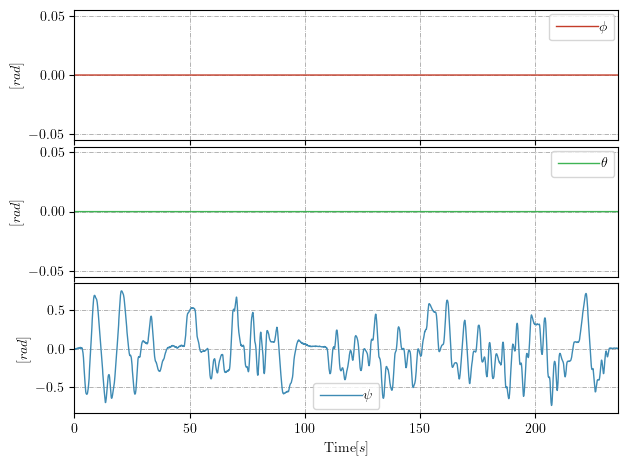

In [7]:
fig13, ax13, ax23, ax33 = fancy_plots_3()
plot_states_angles(fig13, ax13, ax23, ax33, h[7:10, :], t, "Euler Angles Of the system")
plt.show()

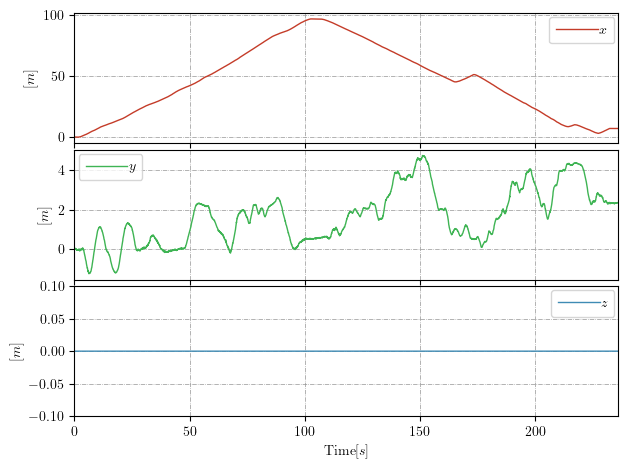

In [8]:
fig14, ax14, ax24, ax34 = fancy_plots_3()
plot_states_position(fig14, ax14, ax24, ax34, h[0:3, :], t, "Position of the system")
plt.show()

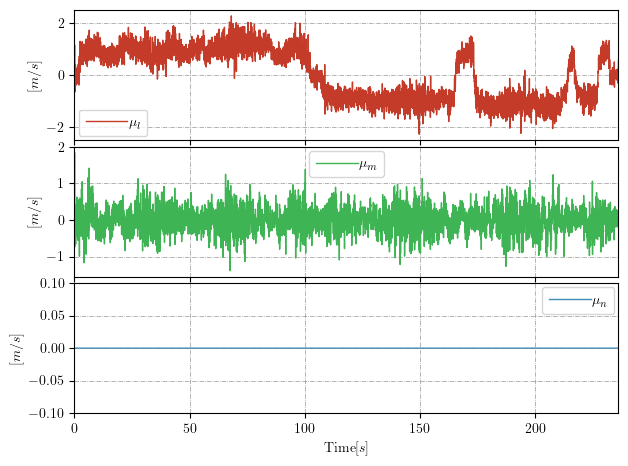

In [9]:
fig15, ax15, ax25, ax35 = fancy_plots_3()
plot_states_velocity_lineal(fig15, ax15, ax25, ax35, hp[0:3, :], t, "Lineal Velocity of the system")
plt.show()

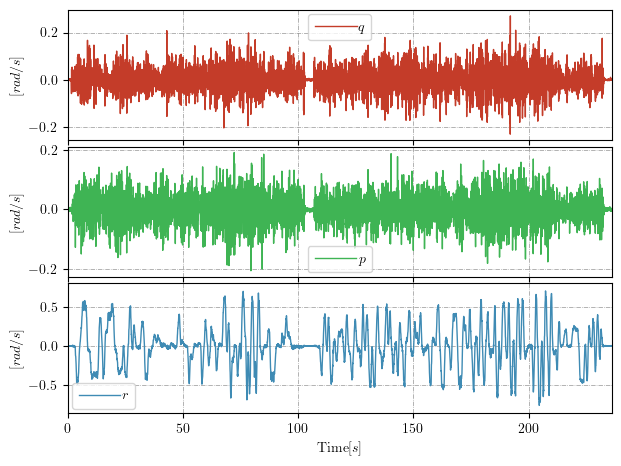

In [10]:
fig16, ax16, ax26, ax36 = fancy_plots_3()
plot_states_velocity_angular(fig16, ax16, ax26, ax36, hp[3:6, :], t, "Angular Velocity of the system")
plt.show()

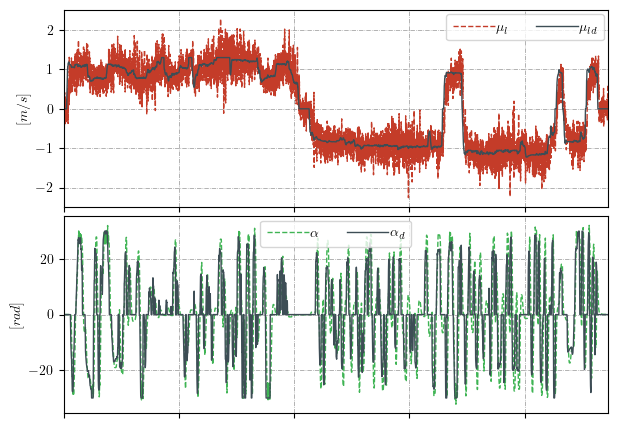

In [11]:
fig17, ax17, ax27 = fancy_plots_2()
plot_control_states(fig17, ax17, ax27, h[10:11, :], hp[0:1, :], T[:, :], t, "Control and Real Values of the system")
plt.show()